# Basic Linear Regression

m = [1.93939394]
b = [4.73333333]


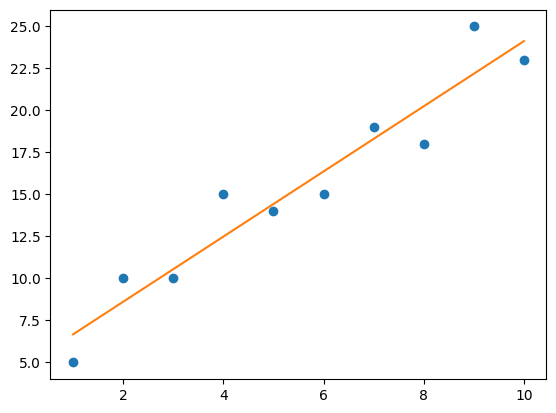

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:,:-1]

# Extract output column (all rows, last column)
y = df.values[:,-1]

# Fit a line to the points
fit = LinearRegression().fit(X, y)

# Intercept and coefficient
m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print("m = {0}".format(m))
print("b = {0}".format(b))

# Show chart
plt.plot(X, y, 'o') # Scatterplot
plt.plot(X, m*X+b) # line
plt.show()

### Calculating the residuals for a given line and data

In [5]:
import pandas as pd

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


### Calculating the sum of squares for a given line and data

In [7]:
import pandas as pd
# Import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()
# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0.0
# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared
print("sum of squares = {}".format(sum_of_squares))

sum of squares = 28.096969704500005


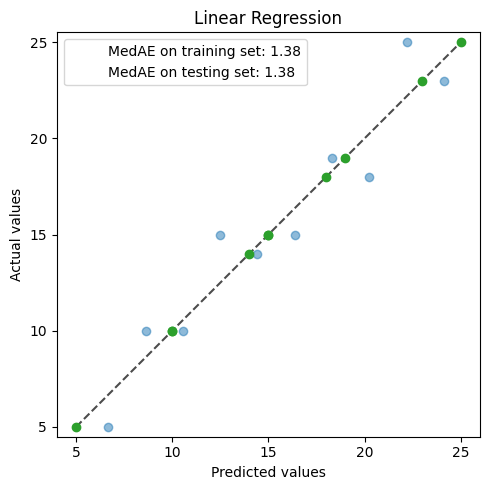

In [24]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y, fit.predict(X))
y_pred = fit.predict(X)
mae_test = median_absolute_error(y, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Linear Regression")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

plt.plot(y, y, 'o') # Scatterplot

